In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
columns = ['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG', 'HTR']
years = ['2010-11', '2011-12', '2012-13', '2013-14', '2014-15', '2015-16', '2016-17', '2017-18', '2018-19', '2019-20', '2020-2021', '2021-2022']

df = pd.read_csv('data/2009-10.csv', usecols=columns)
for year in years:
    df = pd.concat([df, pd.read_csv(f'data/{year}.csv', usecols=columns)])
df.head(3)

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR
0,15/08/09,Aston Villa,Wigan,0,2,A,0,1,A
1,15/08/09,Blackburn,Man City,0,2,A,0,1,A
2,15/08/09,Bolton,Sunderland,0,1,A,0,1,A


## Standings

In [52]:
standings_df = pd.read_csv('data/league_tables.csv')
standings_df

,Season_End_Year,Team,Rk,MP,W,D,L,GF,GA,GD,Pts,Notes
0,1993,Arsenal,10,42,15,11,16,40,38,2,56,→ European Cup Winners' Cup via cup win 2
1,1993,Aston Villa,2,42,21,11,10,57,40,17,74,→ UEFA Cup via league finish
2,1993,Blackburn,4,42,20,11,11,68,46,22,71,NaN
3,1993,Chelsea,11,42,14,14,14,51,54,-3,56,NaN
4,1993,Coventry City,15,42,13,13,16,52,57,-5,52,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
601,2022,Southampton,15,38,9,13,16,43,67,-24,40,NaN
602,2022,Tottenham,4,38,22,5,11,69,40,29,71,→ Champions League via league finish
603,2022,Watford,19,38,6,5,27,34,77,-43,23,Relegated
604,2022,West Ham,7,38,16,8,14,60,51,9,56,→ Europa Conference League via league finish


/var/folders/j_/__b8cqr9627c4f9vjf4yn6p00000gn/T/ipykernel_69131/1321148940.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  st_df['SMA3'] = st_df['Rk'].rolling(3).mean()
/var/folders/j_/__b8cqr9627c4f9vjf4yn6p00000gn/T/ipykernel_69131/1321148940.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  st_df['SMA5'] = st_df['Rk'].rolling(5).mean()
/var/folders/j_/__b8cqr9627c4f9vjf4yn6p00000gn/T/ipykernel_69131/1321148940.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

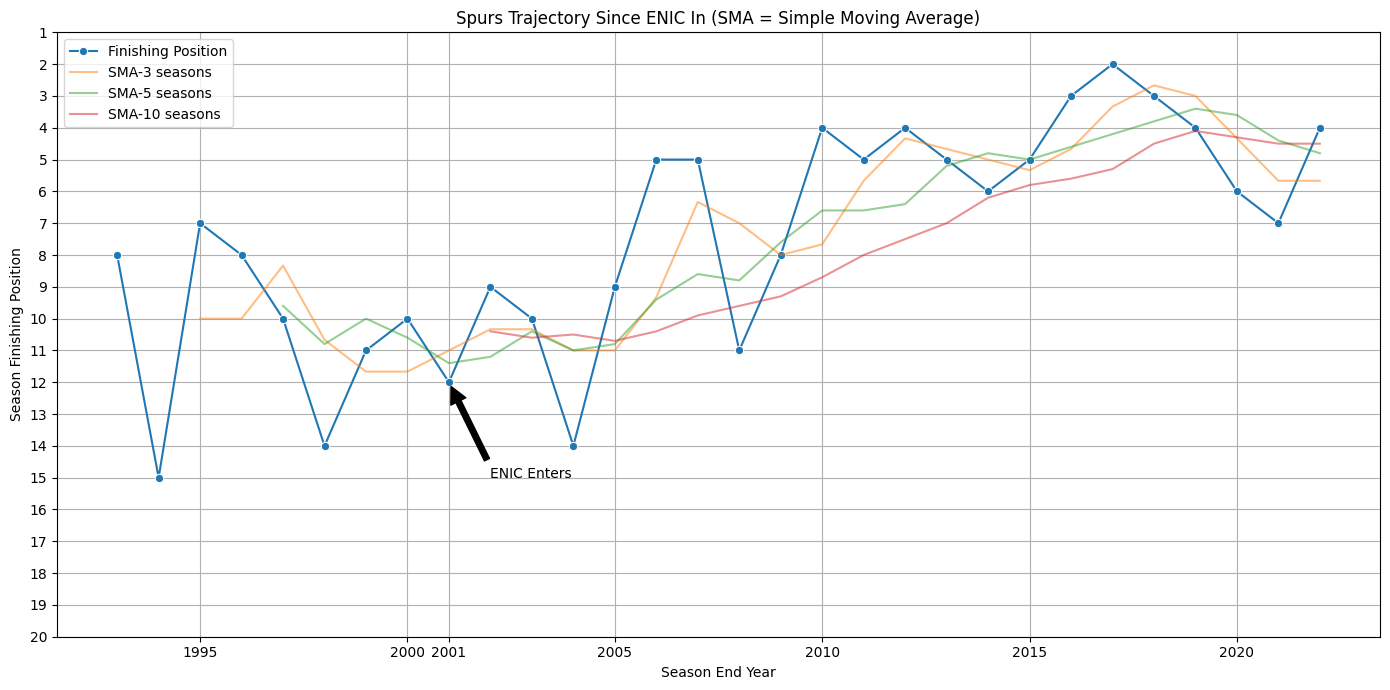

In [65]:
st_df = standings_df[(standings_df.Team == 'Tottenham') 
                    # | (standings_df.Team == 'Arsenal') 
                    # | (standings_df.Team == 'Chelsea') 
                    # | (standings_df.Team == 'Liverpool') 
                    # | (standings_df.Team == 'Manchester City')
                    # | (standings_df.Team == 'Manchester Utd')
                    ]

st_df['SMA3'] = st_df['Rk'].rolling(3).mean()
st_df['SMA5'] = st_df['Rk'].rolling(5).mean()
st_df['SMA10'] = st_df['Rk'].rolling(10).mean()

plt.figure(figsize=(14, 7), tight_layout=True)
sns.lineplot(data=st_df, x='Season_End_Year', y='Rk', hue='Team', style='Team', markers=True, dashes=False, label='Finishing Position', legend=False)
sns.lineplot(data=st_df, x='Season_End_Year', y='SMA3', alpha=0.5, label='SMA-3 seasons')
sns.lineplot(data=st_df, x='Season_End_Year', y='SMA5', alpha=0.5, label='SMA-5 seasons')
sns.lineplot(data=st_df, x='Season_End_Year', y='SMA10', alpha=0.5, label='SMA-10 seasons')
plt.yticks(np.arange(1, 21))
plt.xticks([1995, 2000, 2001, 2005, 2010, 2015, 2020])
plt.gca().invert_yaxis()
plt.gca().annotate('ENIC Enters', xy=(2001, 12), xytext=(2002, 15), arrowprops=dict(facecolor='black', shrink=0.05))
plt.grid()
plt.title('Spurs Trajectory Since ENIC In (SMA = Simple Moving Average)')
plt.ylabel('Season Finishing Position')
plt.xlabel('Season End Year')
# plt.show()
plt.savefig('figures/spurs-enic-in')